In [1]:
from utils.fast_cmod5n import *
from utils.functions import *
from pathlib import Path

In [2]:
processed_data_path = Path("processed_data")
df_wv1 = pd.read_parquet(processed_data_path / 'wv1_complete.parquet')
df_wv2 = pd.read_parquet(processed_data_path / 'wv2_complete.parquet')

In [3]:
print(df_wv1.path_to_sar_file.iloc[0])

/projects/fluxsar/data/Sentinel1/WV/2021/S1A_WV_SLC__1SSV_20211204T155812_20211204T160647_040861_04D9FC_F9F6__WV_015.nc


In [10]:
new_column_names = ['band0_wspd_mean',
 'band0_wspd_median',
 'band0_error_mean',
 'band0_error_median',
 'band0_abs_error_mean',
 'band0_rel_error_mean',
 'band0_rmse',
 'band1_wspd_mean',
 'band1_wspd_median',
 'band1_error_mean',
 'band1_error_median',
 'band1_abs_error_mean',
 'band1_rel_error_mean',
 'band1_rmse',
 'band2_wspd_mean',
 'band2_wspd_median',
 'band2_error_mean',
 'band2_error_median',
 'band2_abs_error_mean',
 'band2_rel_error_mean',
 'band2_rmse']


In [ ]:
# print("Commencing spectral wind error calculation for df1...")

# df_wv1[new_column_names] = df_wv1.apply(lambda x: compute_spectral_wind_errors(
#     x.path_to_sar_file, x.wspd, x.wdir_deg_from_north), axis=1, result_type="expand")

# print("Commencing spectral wind error calculation for df2...")
# df_wv2[new_column_names] = df_wv2.apply(lambda x: compute_spectral_wind_errors(
#     x.path_to_sar_file, x.wspd, x.wdir_deg_from_north), axis=1, result_type="expand")

# # write to parquet
# print("Writing df1 to parquet...")
# df_wv1.to_parquet(processed_data_path / 'wv1_complete.parquet')
# print("Writing df2 to parquet...")
# df_wv2.to_parquet(processed_data_path / 'wv2_complete.parquet')
# print("Done.")

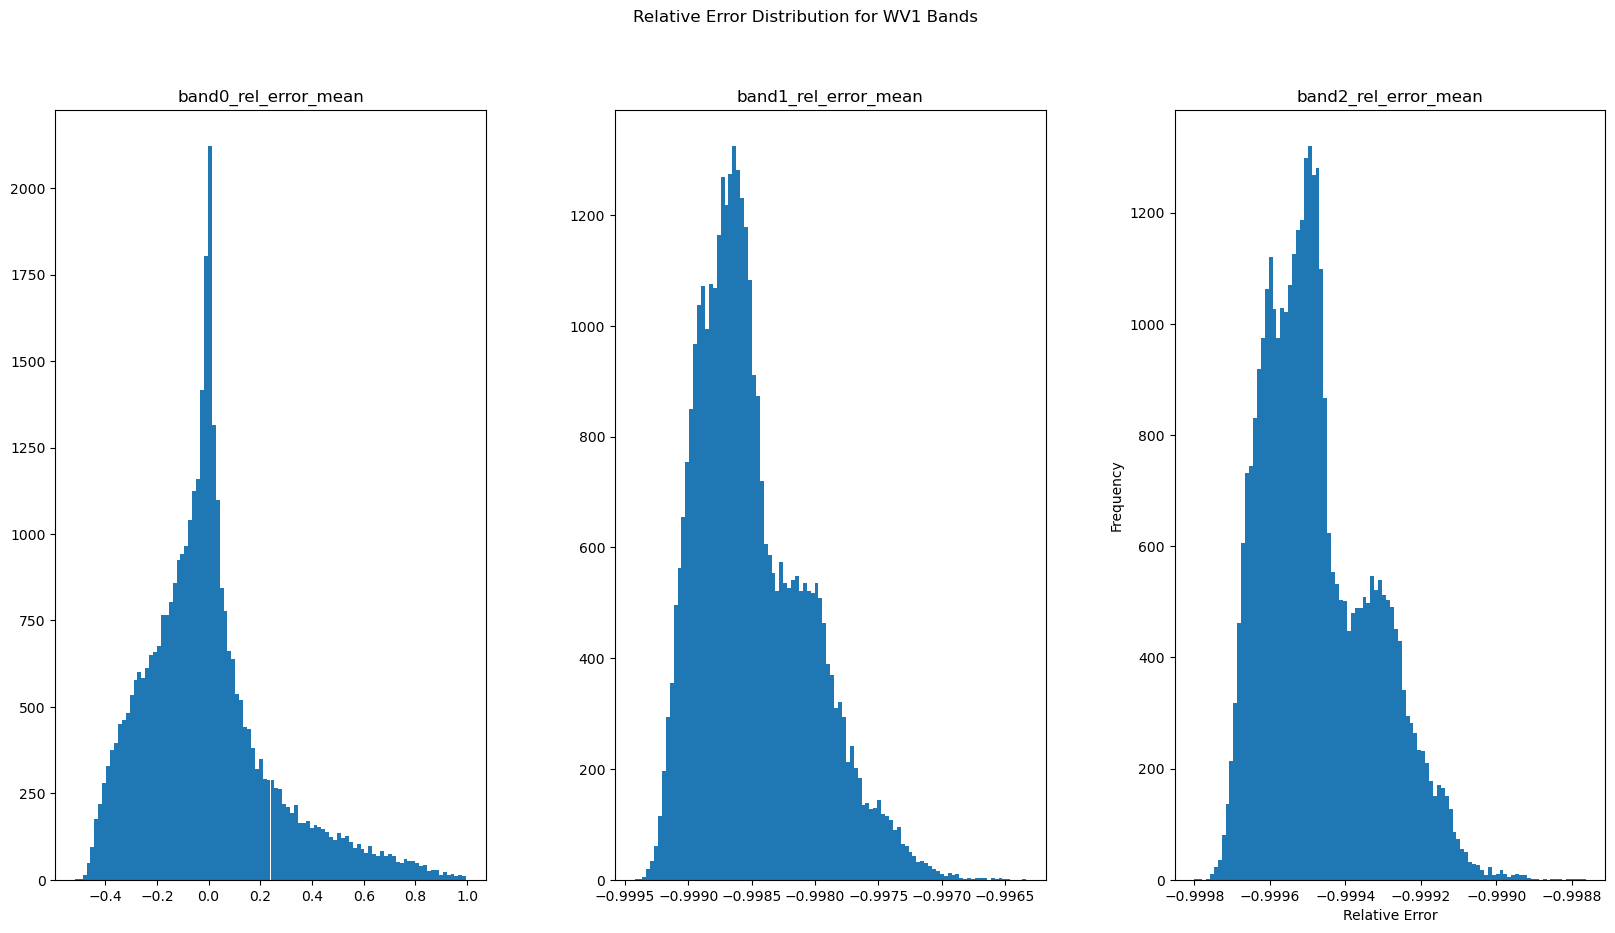

In [4]:
df_wv1[["band0_rel_error_mean", "band1_rel_error_mean", "band2_rel_error_mean"]].hist(bins=100, figsize=(20, 10), layout=(1, 3), grid=False)
plt.suptitle("Relative Error Distribution for WV1 Bands")
plt.xlabel("Relative Error")
plt.ylabel("Frequency")
plt.show()


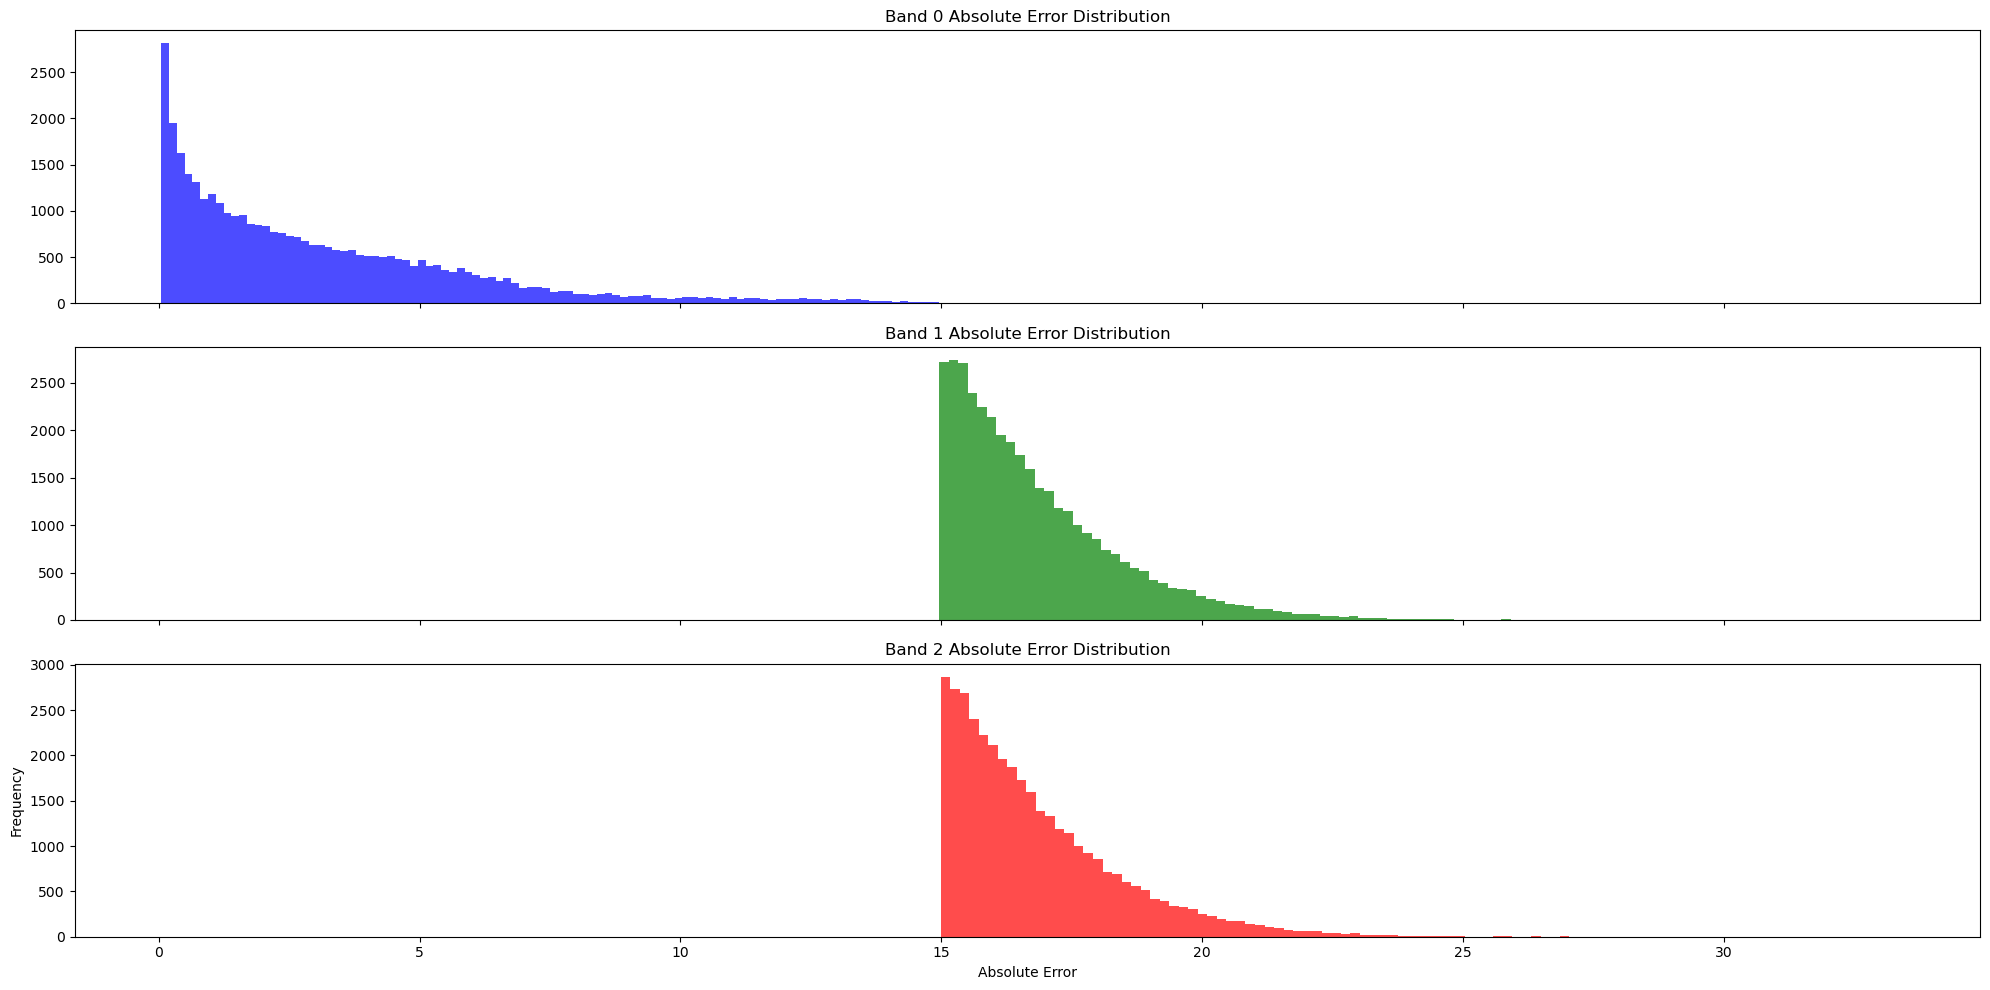

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
axs[0].hist(df_wv1["band0_abs_error_mean"], bins=100, color='blue', alpha=0.7)
axs[0].set_title("Band 0 Absolute Error Distribution")
axs[1].hist(df_wv1["band1_abs_error_mean"], bins=100, color='green', alpha=0.7)
axs[1].set_title("Band 1 Absolute Error Distribution")
axs[2].hist(df_wv1["band2_abs_error_mean"], bins=100, color='red', alpha=0.7)
axs[2].set_title("Band 2 Absolute Error Distribution")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
